# 1. Data Download & import

In [1]:
# Dataset Download
!mkdir -p ~/.kaggle
!cp '/content/drive/Othercomputers/내 컴퓨터/Colab/kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d pavansubhasht/ibm-hr-analytics-attrition-dataset

# unzip file
!unzip '/content/ibm-hr-analytics-attrition-dataset.zip'

  0% 0.00/50.1k [00:00<?, ?B/s]
100% 50.1k/50.1k [00:00<00:00, 36.4MB/s]
Archive:  /content/ibm-hr-analytics-attrition-dataset.zip
  inflating: WA_Fn-UseC_-HR-Employee-Attrition.csv  


In [32]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# 2. read csv

In [3]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# 3. Missing Value

In [4]:
# Missing Value
missing_data = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


<Axes: >

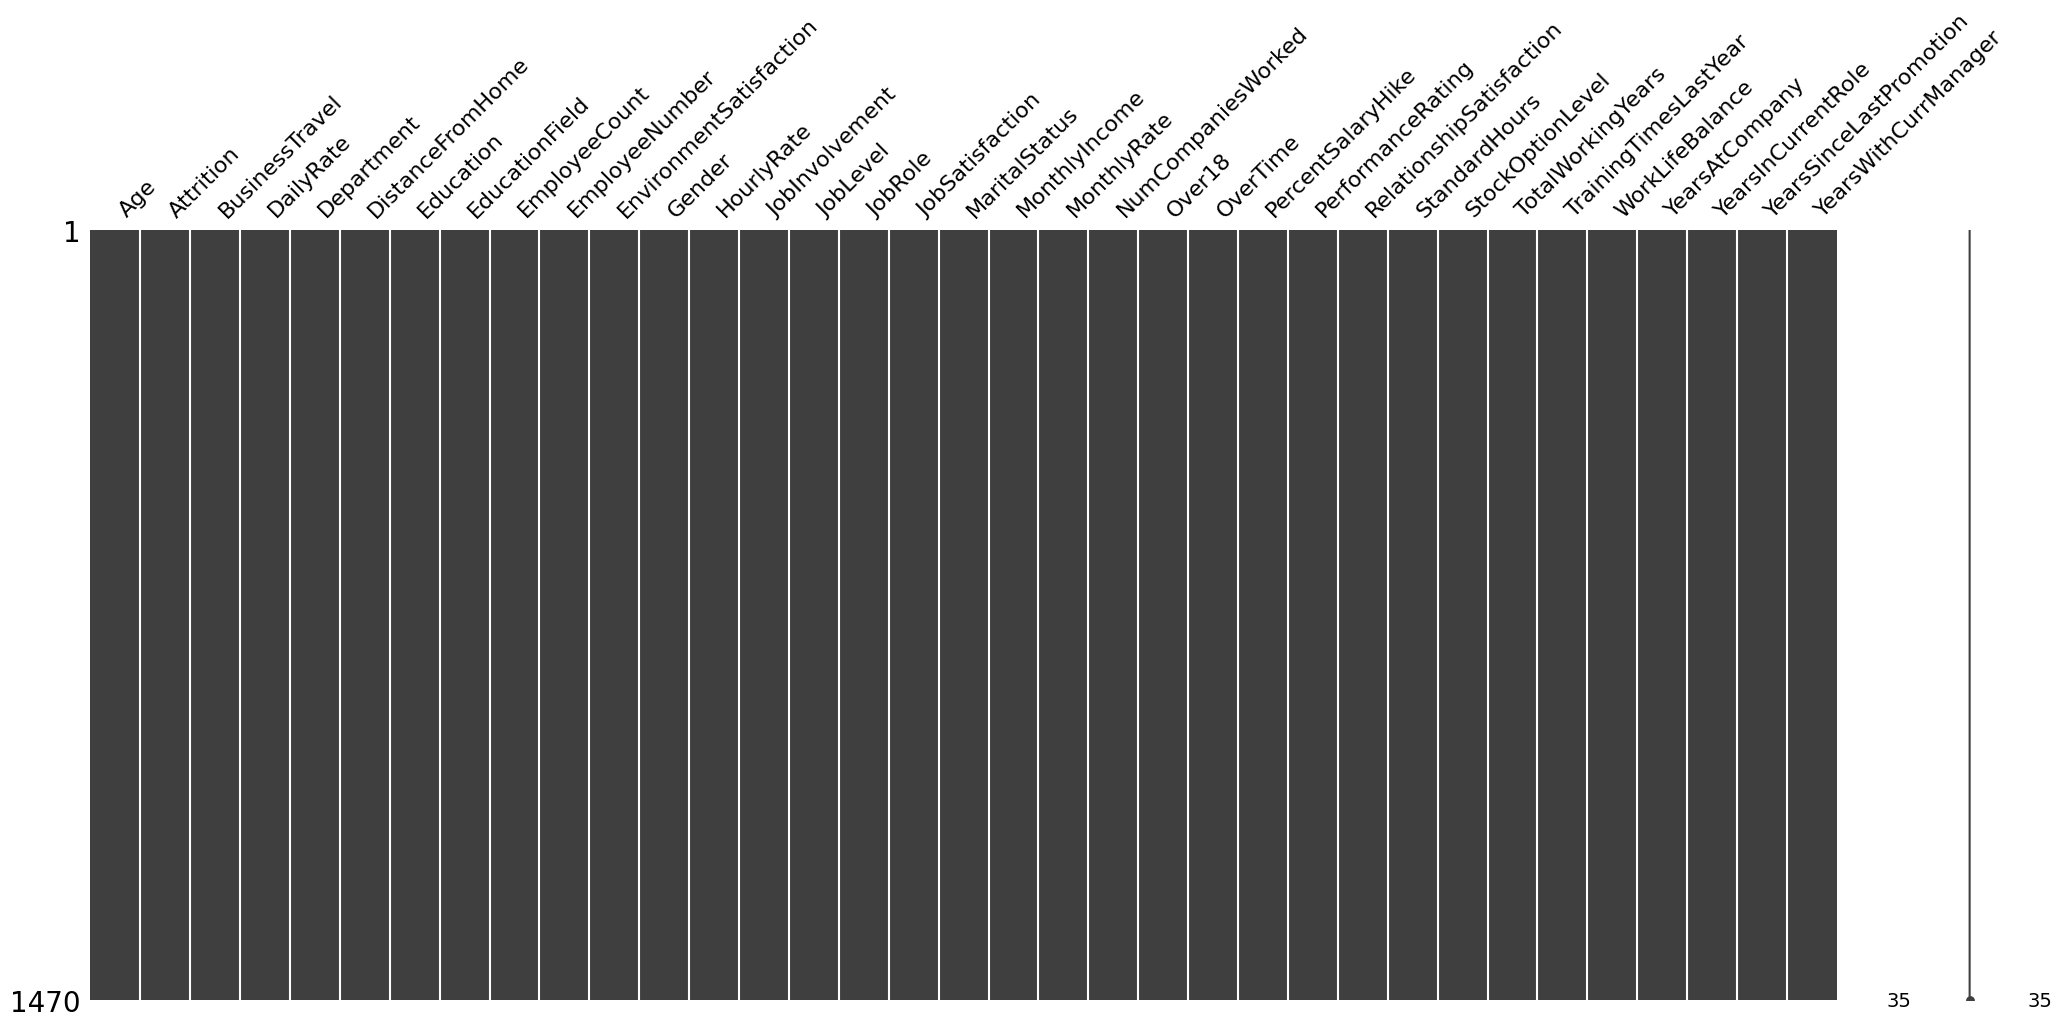

In [5]:
msno.matrix(df)

# 4. Outlier

In [6]:
# Outlier
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


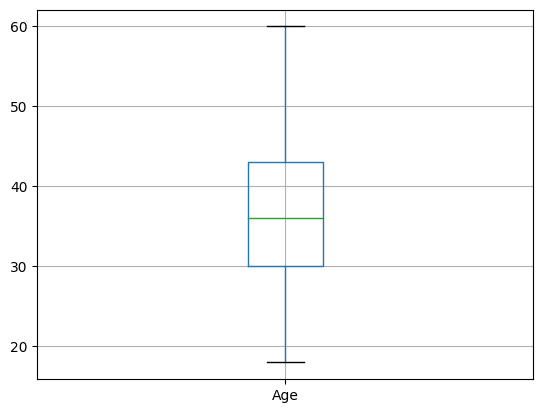

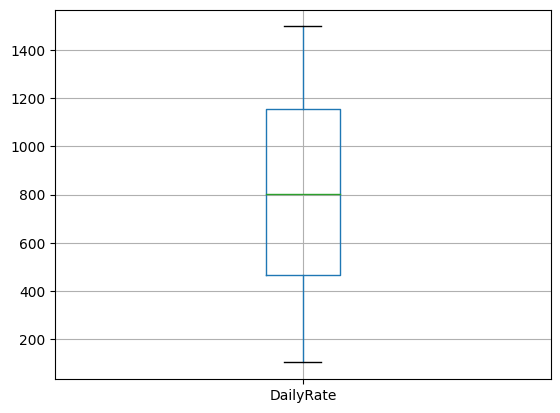

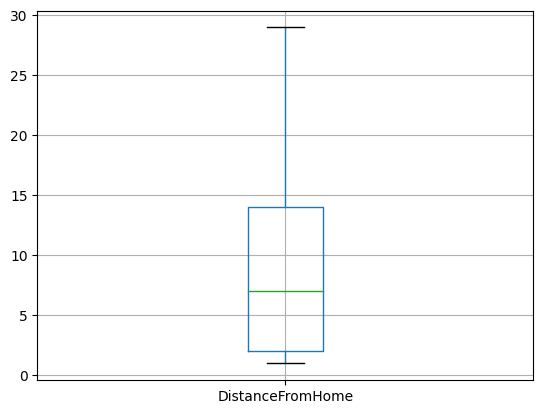

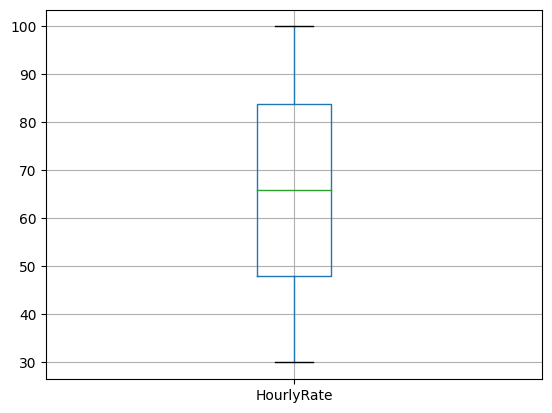

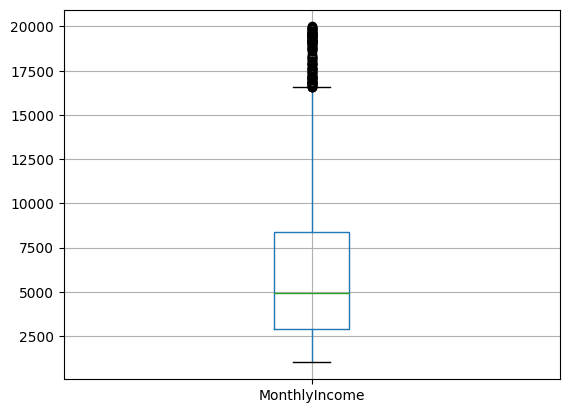

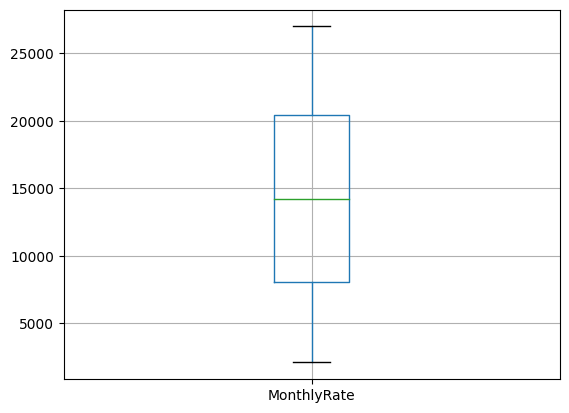

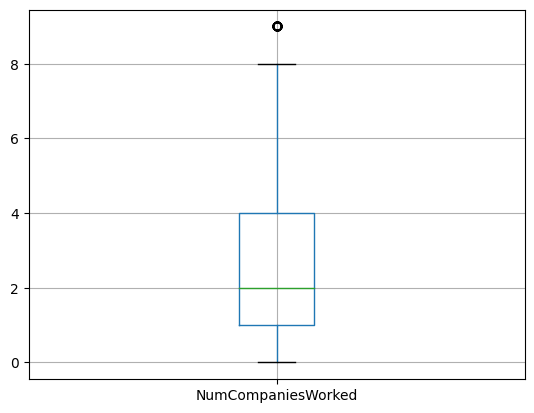

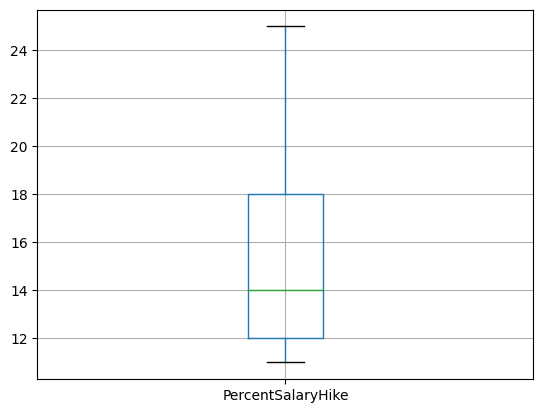

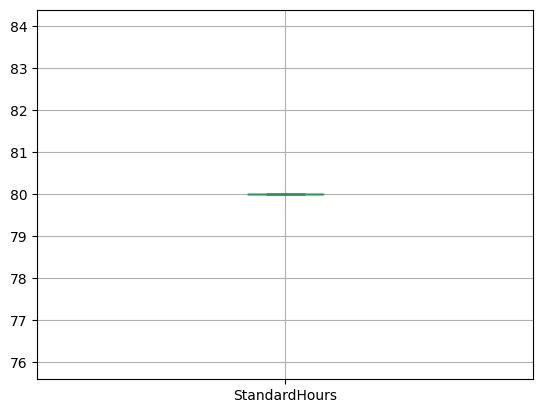

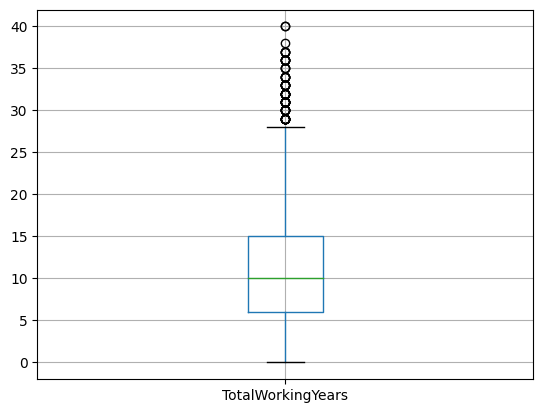

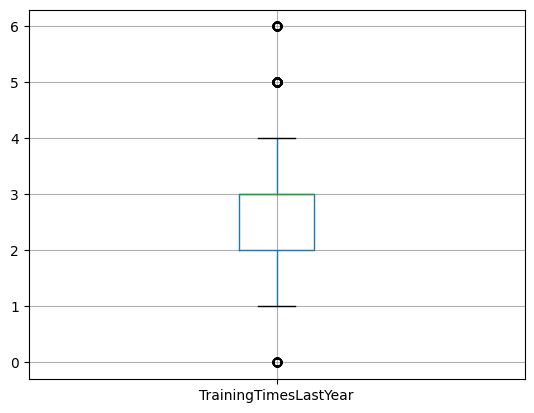

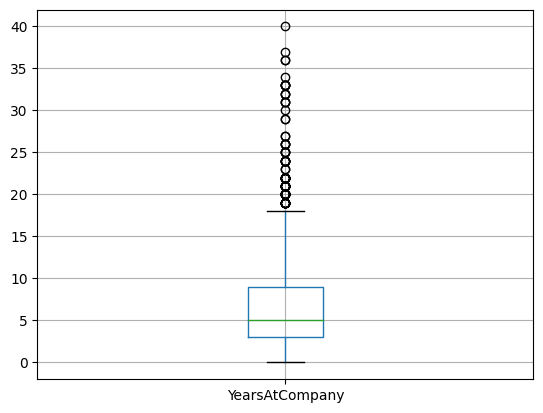

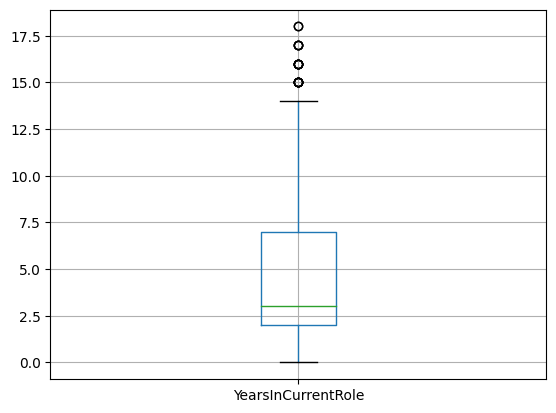

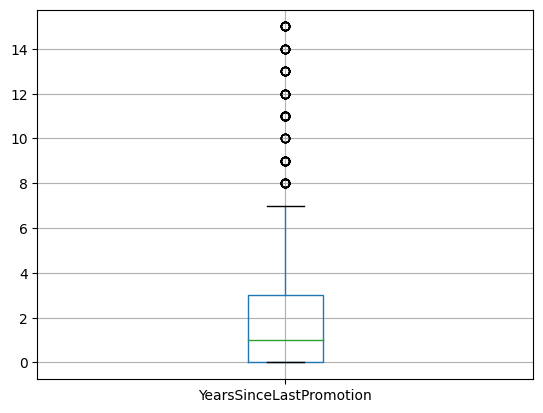

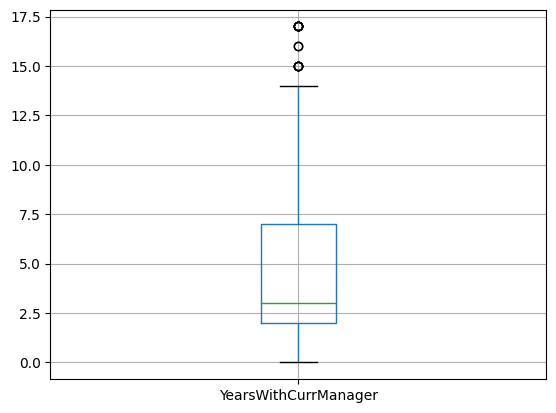

In [23]:
discrete_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
for i in discrete_features:
    df.boxplot(column=i)
    plt.show()

# 5. Visualization

In [30]:
# Visualization
categorical_features = ['Attrition', 'BusinessTravel','Department', 'Education', 'EducationField', 'EmployeeCount','EmployeeNumber',
                    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                    'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                    'WorkLifeBalance']
colors = ['#2BAE66','#FCF6F5']

df1 = df.copy(deep=True)

le = LabelEncoder()
l1 = []; l2 = []; text_categorical_features = []
print('Label Encoder Transformation')
for i in categorical_features:
    if type(df1[i][0]) == str:
        text_categorical_features.append(i)
        df1[i] = le.fit_transform(df1[i])
        l1.append(list(df1[i].unique())); l2.append(list(le.inverse_transform(df1[i].unique())))
        print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))


Label Encoder Transformation
Attrition  :  [1 0]  =  ['Yes' 'No']
BusinessTravel  :  [2 1 0]  =  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department  :  [2 1 0]  =  ['Sales' 'Research & Development' 'Human Resources']
EducationField  :  [1 4 3 2 5 0]  =  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender  :  [0 1]  =  ['Female' 'Male']
JobRole  :  [7 6 2 4 0 3 8 5 1]  =  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus  :  [2 1 0]  =  ['Single' 'Married' 'Divorced']
Over18  :  [0]  =  ['Y']
OverTime  :  [1 0]  =  ['Yes' 'No']


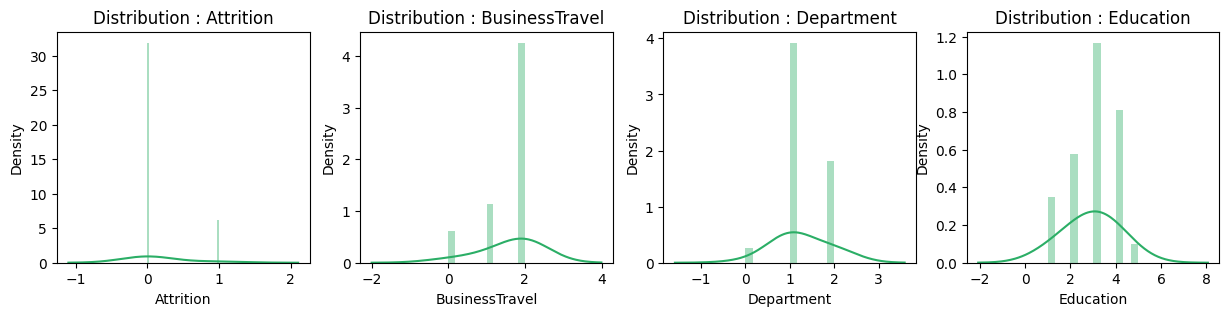

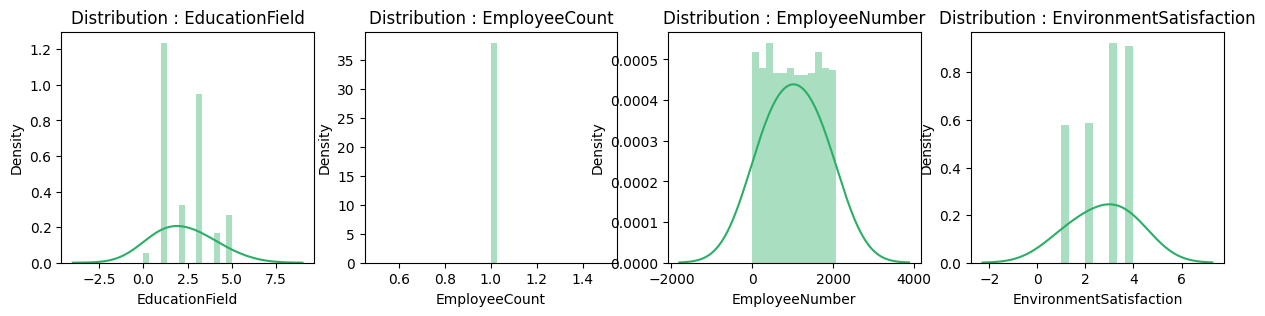

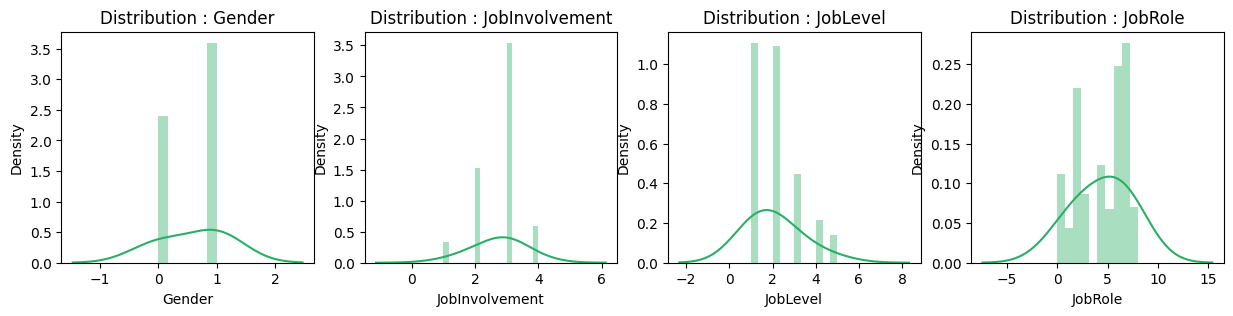

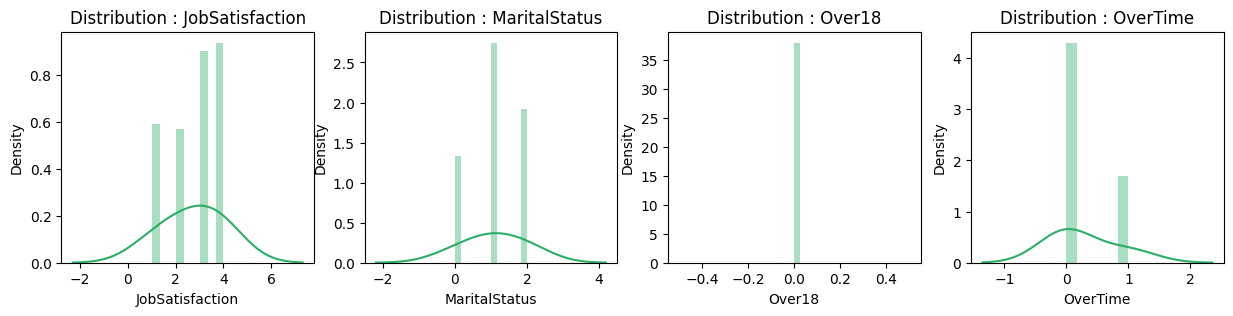

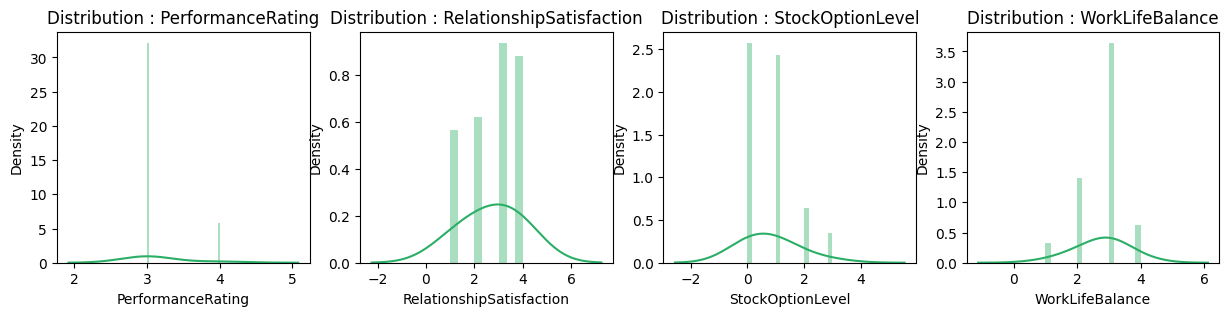

In [33]:
# Categorical Feature Distribution
for i in range(5):
    fig, ax = plt.subplots(nrows = 1,ncols = 4,figsize = (15,3))
    a = 1
    for j in categorical_features[(i*4) : (i*4) + 4]:
        plt.subplot(1,4,a)
        sns.distplot(df1[j],kde_kws = {'bw' : 1},color = colors[0]);
        plt.title('Distribution : ' + j)
        a += 1

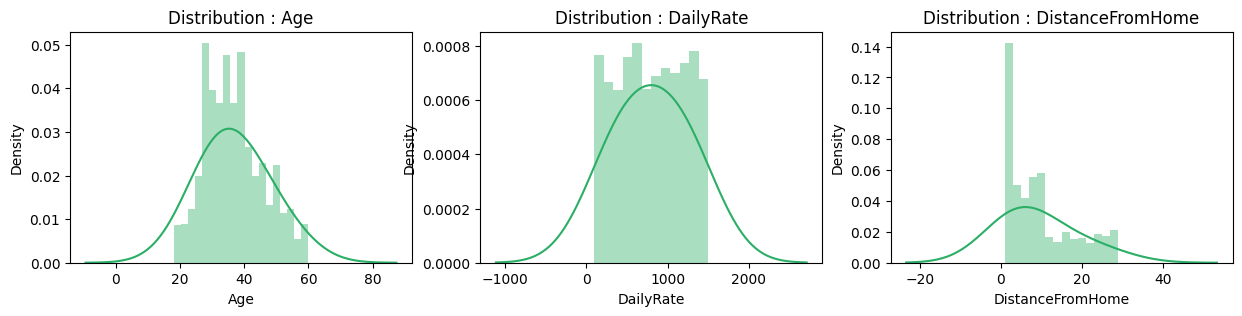

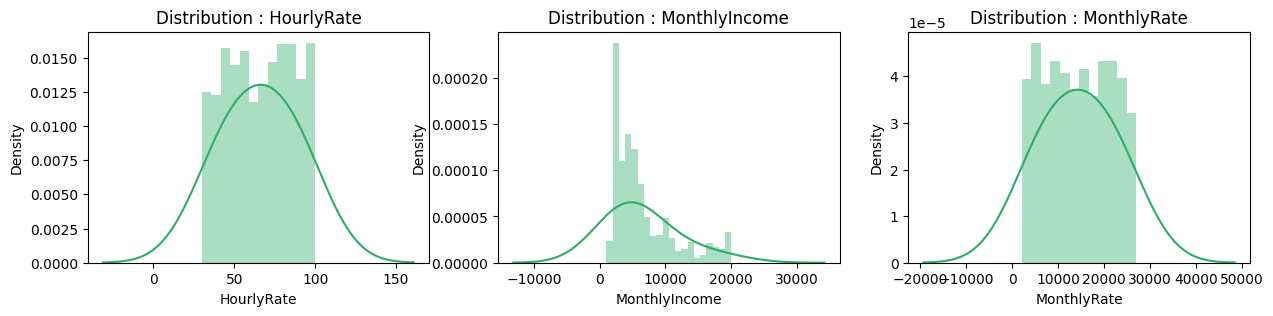

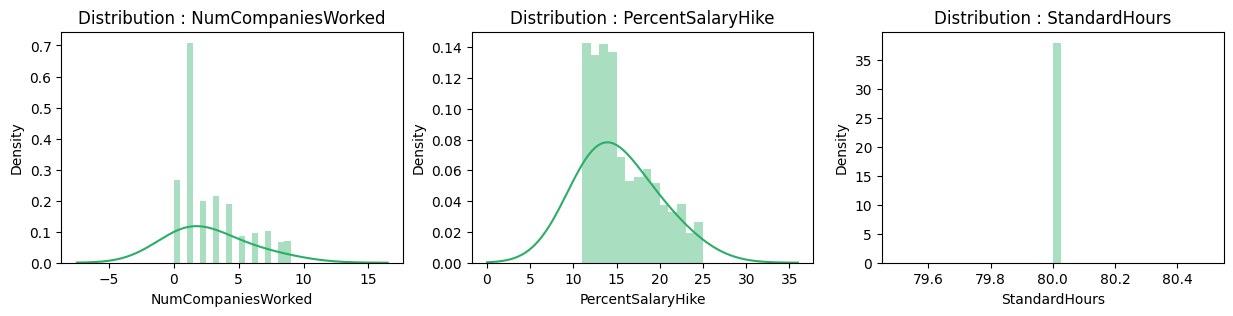

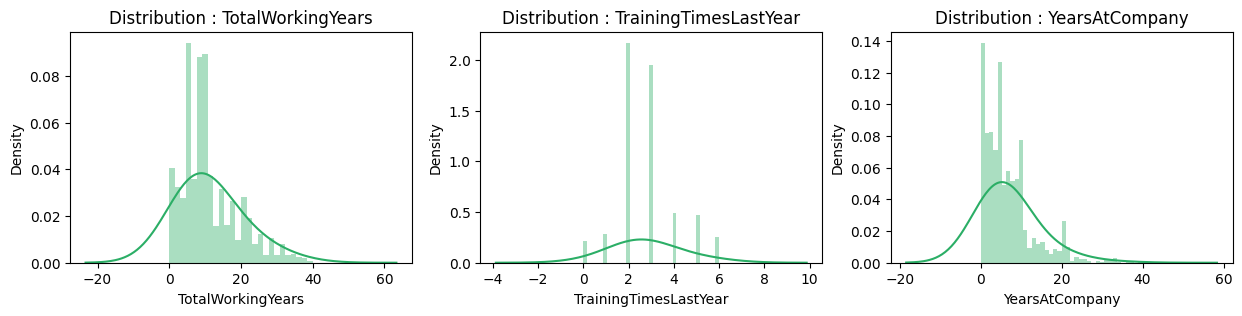

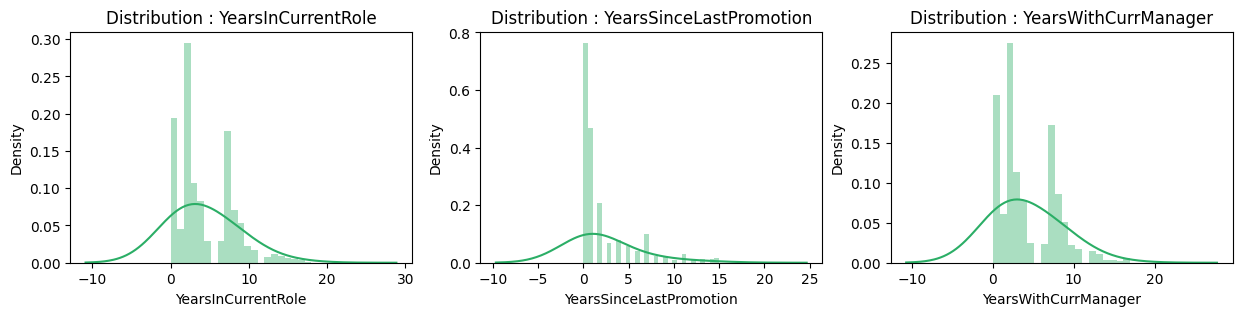

In [34]:
# Discrete Feature
df1.drop(columns = ['EmployeeCount', 'EmployeeNumber', 'Over18'], inplace = True)
categorical_features.remove('EmployeeCount'); categorical_features.remove('EmployeeNumber')
categorical_features.remove('Over18'); categorical_features.remove('Attrition')

for i in range(5):
    fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,3))
    a = 1
    for j in discrete_features[(i*3) : (i*3) + 3]:
        plt.subplot(1,3,a)
        sns.distplot(df1[j],kde_kws = {'bw' : 1},color = colors[0]);
        plt.title('Distribution : ' + j)
        a += 1

<Axes: xlabel='Gender', ylabel='count'>

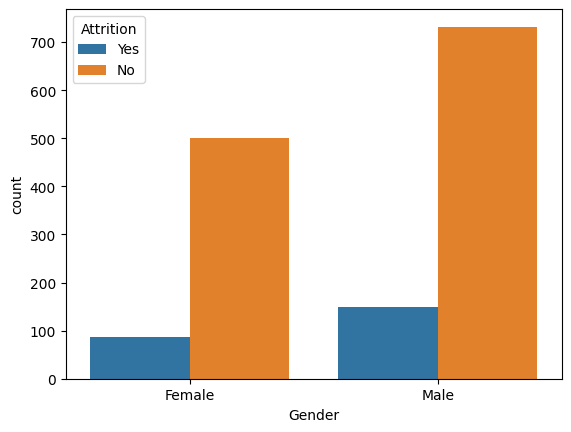

In [36]:
sns.countplot(x='Gender', hue='Attrition',data=df)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

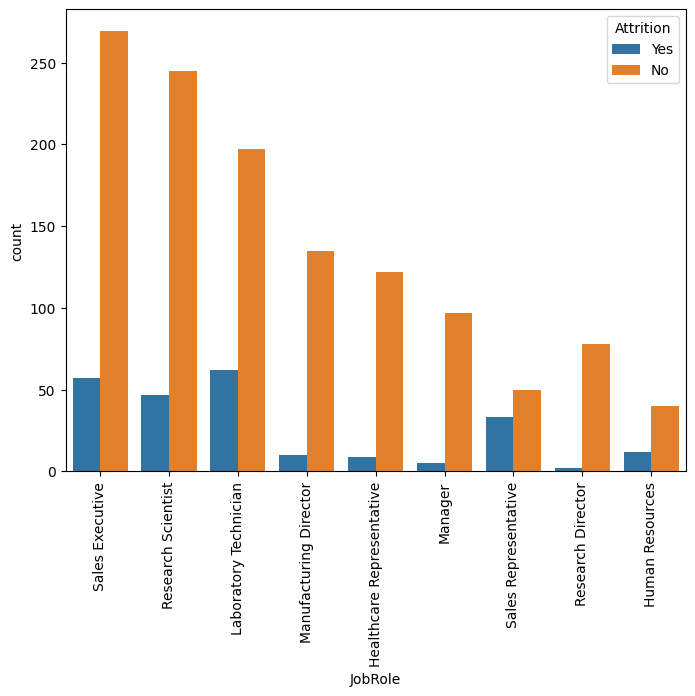

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(x='JobRole', hue='Attrition', data=df);
plt.xticks(rotation=90)

<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

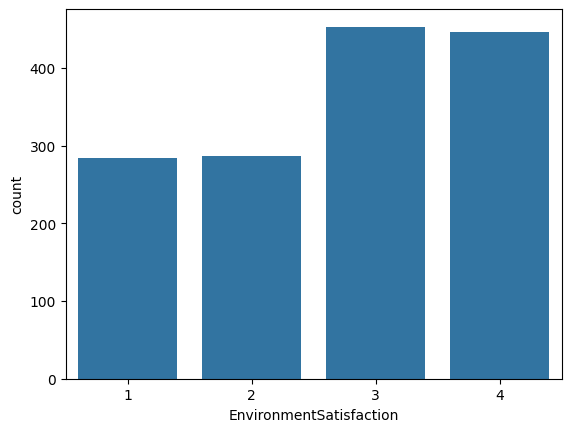

In [39]:
sns.countplot(x='EnvironmentSatisfaction', data=df)

# 6. Correlation

<ipython-input-24-651d0fc5479d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = employee_data.corr()


<Axes: >

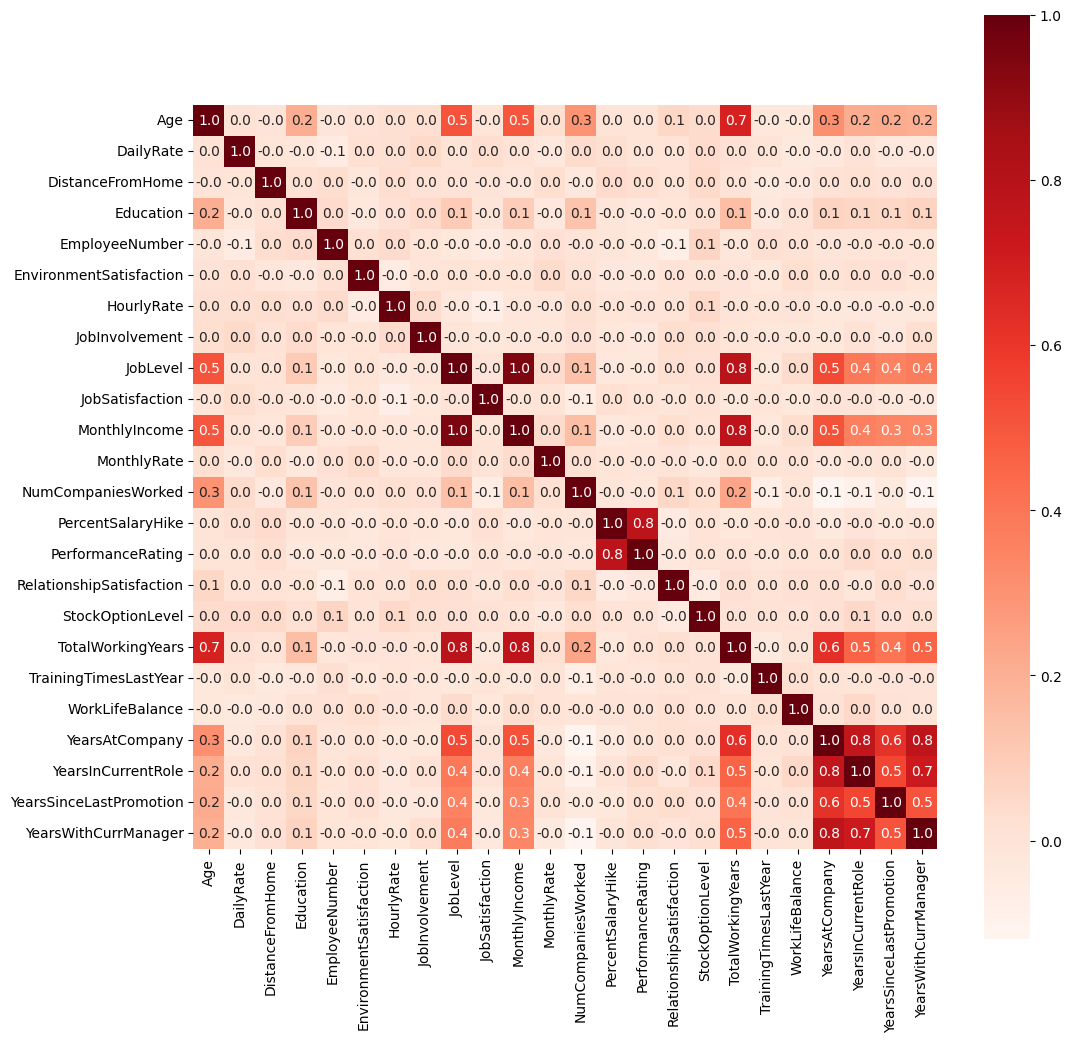

In [24]:
# correlation

employee_data = df.drop(['EmployeeCount','StandardHours'], axis=1)
corr = employee_data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

# 7. Add Feature

In [ ]:
# Add Feature

In [42]:
df['Age'].value_counts()

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

In [49]:
# Age와 Gender를 통해 2~30대 남/여성 & 4~50대 남/여성의 feature 생성
df_new = df.copy(deep=True)
df_new['Young&Old'] = df_new.apply(lambda row: 'Young Man' if (row['Age'] >= 20 and row['Age'] < 40 and row['Gender'] == 'Male') else
                                      'Young Woman' if (row['Age'] >= 20 and row['Age'] < 40 and row['Gender'] == 'Female') else
                                      'Old Man' if (row['Age'] >= 40  and row['Gender'] == 'Male') else
                                       'Old Woman' if (row['Age'] >= 40  and row['Gender'] == 'Female') else '' , axis=1)

In [50]:
df_new['Young&Old']

0         Old Woman
1           Old Man
2         Young Man
3       Young Woman
4         Young Man
           ...     
1465      Young Man
1466      Young Man
1467      Young Man
1468        Old Man
1469      Young Man
Name: Young&Old, Length: 1470, dtype: object